In [5]:
from pathlib import Path
import pandas as pd
from matplotlib import pyplot as plt

In [6]:
base_dir = Path("/Users/atlisa/Projects/mal_og_taekni/eilisch")
data_dir = base_dir / "parsed_data"
data_file = data_dir / 'all_instances.tsv'
df = pd.read_csv(data_file, sep='\t')

In [7]:
print(f"Fjöldi merktra tilvika: {len(df)}")

Fjöldi merktra tilvika: 574913


In [8]:
df['speech_type'] = df['speech_type'].apply(lambda x: "andsvar" if x == "svar" else x)

# Heildardreifing reæðutegunda

In [12]:
df['speech_type'].value_counts()

speech_type
ræða                           397685
flutningsræða                   89990
andsvar                         60546
um fundarstjórn                  7898
óundirbúinn fyrirspurnatími      6902
útvarpsræða                      4735
grein fyrir atkvæði              3838
um atkvæðagreiðslu               2892
prent                             222
ber af sér sakir                   95
málsh. um fundarstjórn             74
jómfrúrræða                        36
Name: count, dtype: int64

# Hlutfall ræðutegunda eftir árum

In [9]:
def get_label_percentage(df, label):
    perc_dict = {}

    for year, data in df.groupby('year'):
        nr_none = (data['speech_type'] == label).sum()
        perc = nr_none / len(data)
        perc_dict[year] = perc

    return perc_dict

In [10]:
top_4 = df['speech_type'].value_counts()[:4].index.tolist()

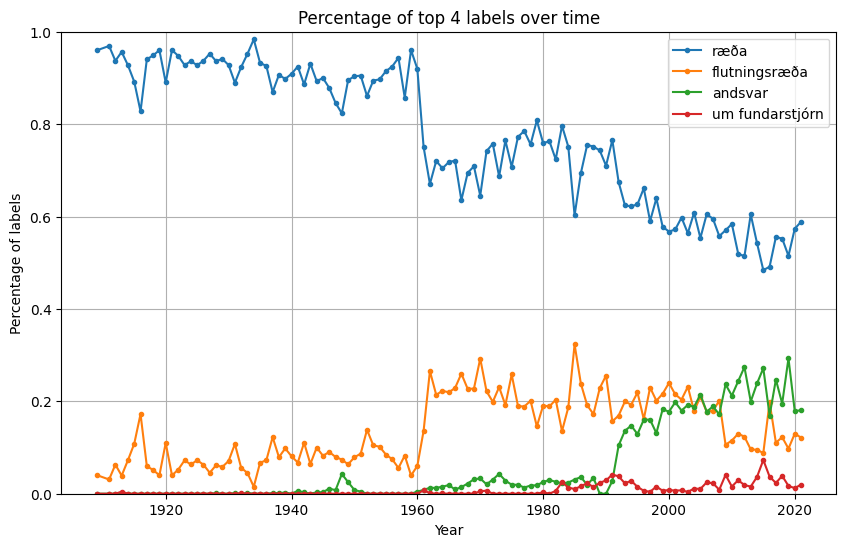

In [11]:
plt.figure(figsize=(10, 6))
for label in top_4:
    perc_dict = get_label_percentage(df, label)
    plt.plot(list(perc_dict.keys()), list(perc_dict.values()), marker='.', label=label)

plt.legend()
plt.xlabel('Year')
plt.ylabel('Percentage of labels')
plt.title('Percentage of top 4 labels over time')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

Eins og sést á grafinu þá er merkingin "ræða" lang algengust til 1960. Eftir það er hún enn mjög algeng en þó má sjá að hinar ræðutegundirnar sækja smá á.

# Dreifing ræðutegunda eftir alþingismönnum

In [13]:
mp_list = ["AsmundurDadason", "SteingrimurSigfusson", "BjarniBenediktsson1970", "THorgerdurGunnarsdottir"]

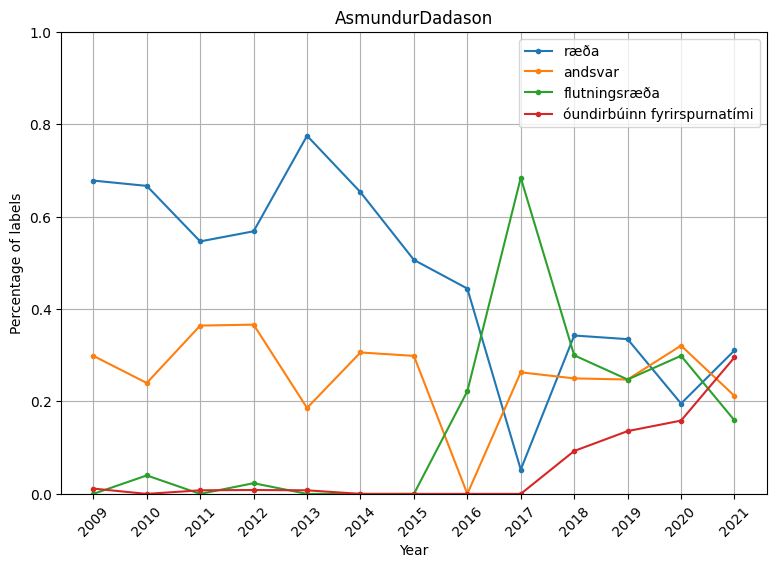

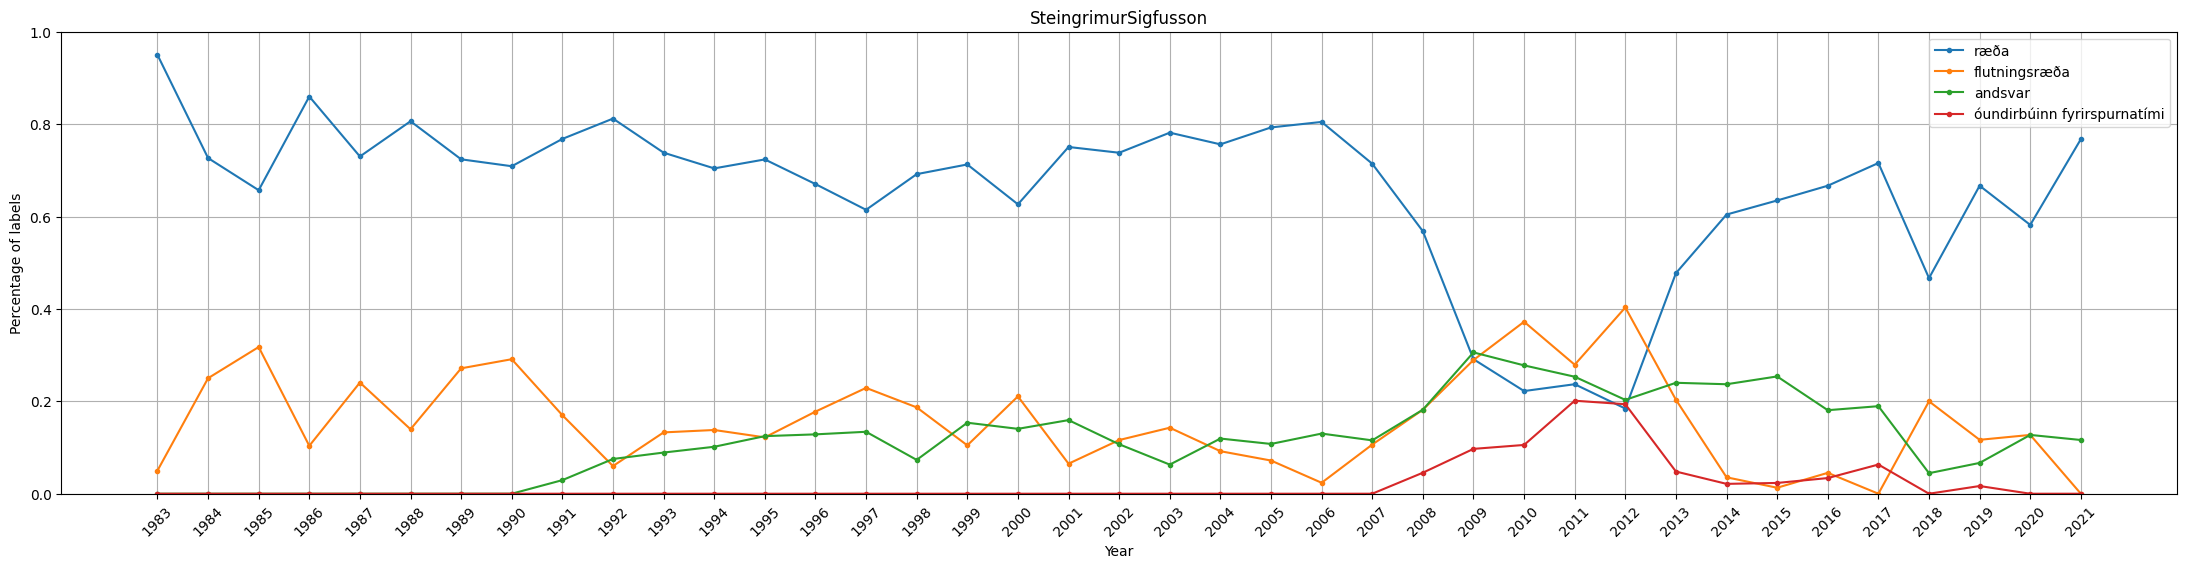

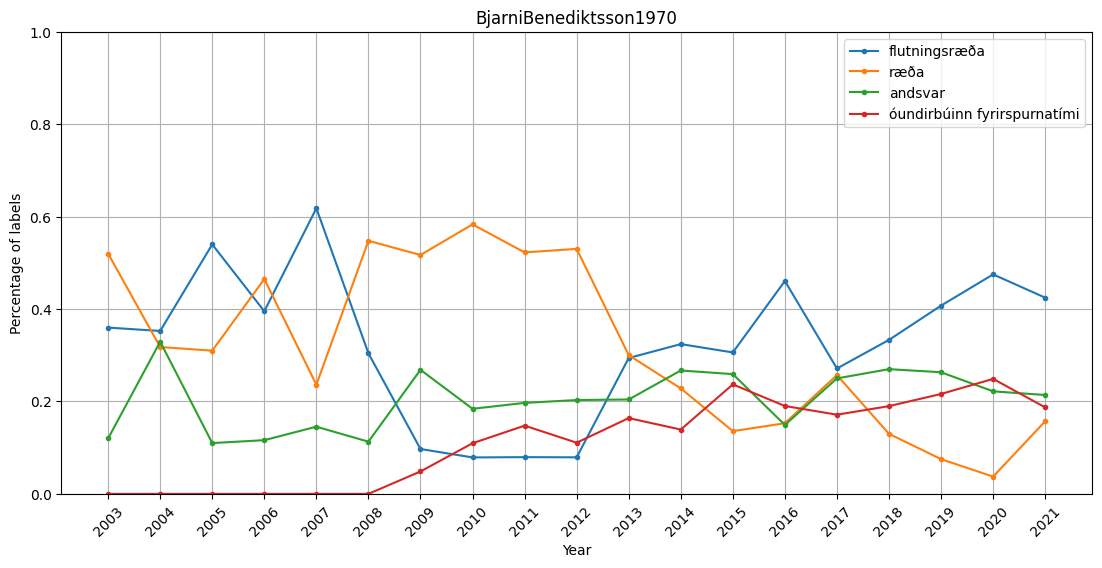

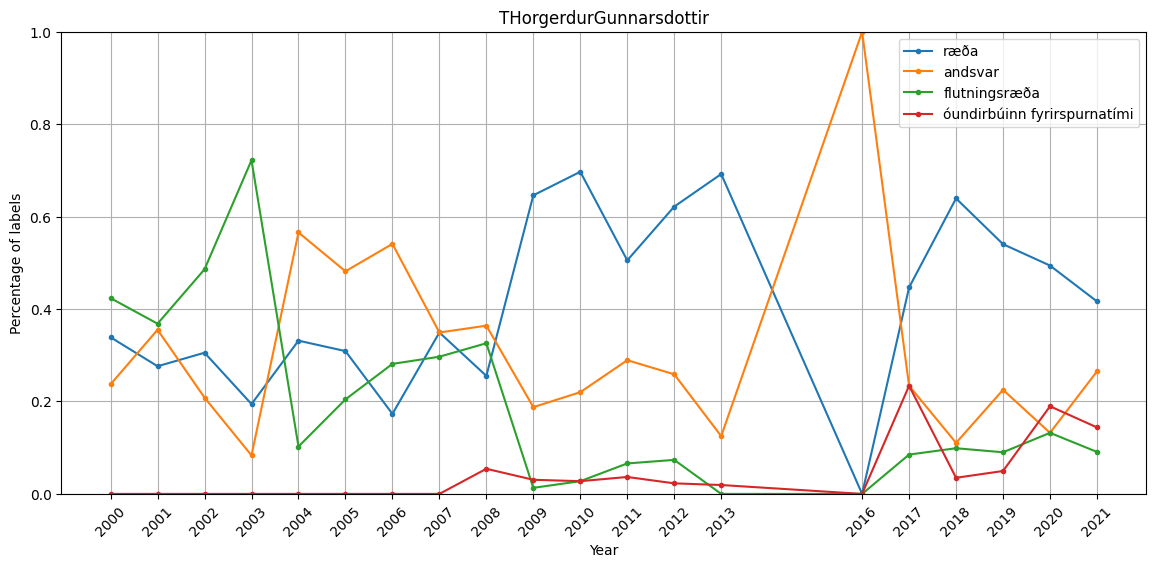

In [14]:
def check_mp_speech_types(df, mp):
    mp_dict = {}
    mp_df = df[df['person'] == mp]
    top_4 = mp_df['speech_type'].value_counts()[:4].index.tolist()

    for year, data in mp_df.groupby('year'):
        mp_dict[year] = {}
        for label in top_4:
            speech_type = data[data['speech_type'] == label]
            nr_speech = len(speech_type)
            perc = nr_speech / len(data)
            mp_dict[year][label] = perc

    return mp_dict, top_4


for mp_id in mp_list:
    data, top_4 = check_mp_speech_types(df, mp_id)
    tick_range = list(data.keys())
    plt.figure(figsize=(10 * len(tick_range) * 0.07, 6))
    plt.plot(list(data.keys()), [list(data[year].values()) for year in data.keys()], label=top_4, marker=".")
    plt.legend()
    plt.xlabel('Year')
    plt.ylabel('Percentage of labels')
    plt.title(mp_id)
    plt.xticks(tick_range, rotation=45)
    plt.ylim(0, 1)
    plt.grid(True)
    plt.show()

Hér að ofan sjást 4 algengustu ræðutegundir hvers þingmanns. Skýring hvers línurits sýnir ræðutegundir í röð frá algengustu (efst) til þeirrar óalgengustu (neðst) af þessum fjórum.